Gabriel Avinaz

Week 6

4/17/23
## Assignment 6
### Assignment 6.1

In [1]:
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import CSVLogger
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [2]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

csv_logger = CSVLogger('results/mnist_model.log')
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, callbacks=csv_logger)

model.save('results/mnist_model.h5')

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1752 - acc: 0.9447
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0480 - acc: 0.9850
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0339 - acc: 0.9896
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0249 - acc: 0.9925
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0189 - acc: 0.9945


In [3]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0406 - acc: 0.9868


In [4]:
test_acc

0.9868000149726868

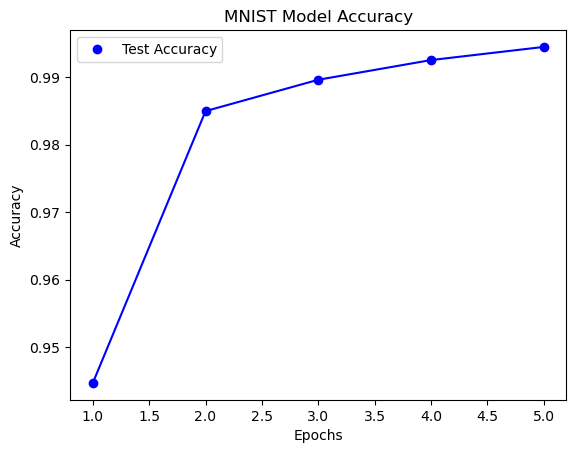

In [5]:
accuracy = history.history['acc']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Test Accuracy')
plt.plot(epochs, accuracy, 'b')
plt.title('MNIST Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("results/mnist_model.png")
plt.show()